# Imports

In [ ]:
# @title import libraries
# cálculos
import numpy as np
import pandas as pd

# fechas
import datetime as dt
from datetime import date
#from dateutil.relativedelta import relativedelta

# gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# @title import data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# poner la ruta de los archivos
test_df = pd.read_csv('/content/drive/MyDrive/proyectos datapath/test.csv')
train_df = pd.read_csv('/content/drive/MyDrive/proyectos datapath/train.csv')
sample_df = pd.read_csv('/content/drive/MyDrive/proyectos datapath/sample_submission.csv')

In [ ]:
# @title
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [ ]:
# @title
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
# @title
sample_df

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


<Axes: ylabel='count'>

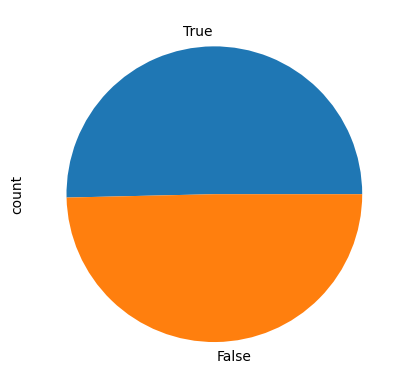

In [ ]:
# @title Proportion of Transported Passengers

train_df['Transported'].value_counts().plot(kind='pie')

In [ ]:
print(f"Duplicates in Train Dataset is:{train_df.duplicated().sum()},({100*train_df.duplicated().sum()/len(train_df)})%")
print(f"Duplicates in Test Dataset is:{test_df.duplicated().sum()},({100*test_df.duplicated().sum()/len(test_df)})%")

Duplicates in Train Dataset is:0,(0.0)%
Duplicates in Test Dataset is:0,(0.0)%


In [ ]:
test_df.info()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 

# Data cleaning

In [ ]:
train_df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [ ]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [ ]:
round(train_df.isnull().sum().div(len(train_df)).mul(100), 1)

PassengerId     0.0
HomePlanet      2.3
CryoSleep       2.5
Cabin           2.3
Destination     2.1
Age             2.1
VIP             2.3
RoomService     2.1
FoodCourt       2.1
ShoppingMall    2.4
Spa             2.1
VRDeck          2.2
Name            2.3
Transported     0.0
dtype: float64

In [ ]:
round(test_df.isnull().sum().div(len(test_df)).mul(100), 1)

PassengerId     0.0
HomePlanet      2.0
CryoSleep       2.2
Cabin           2.3
Destination     2.2
Age             2.1
VIP             2.2
RoomService     1.9
FoodCourt       2.5
ShoppingMall    2.3
Spa             2.4
VRDeck          1.9
Name            2.2
dtype: float64

In [ ]:
train_df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [ ]:
test_df.nunique()

PassengerId     4277
HomePlanet         3
CryoSleep          2
Cabin           3265
Destination        3
Age               79
VIP                2
RoomService      842
FoodCourt        902
ShoppingMall     715
Spa              833
VRDeck           796
Name            4176
dtype: int64

In [ ]:
#buscando en internet el data set en la passerger se pueden ver 2 numeros por lo que los dividimos con una funcion y un split embebido, asi tendremos grupo y miembro

#feature engeneering
def passengerid_new_features(df):

    #Splitting Group and Member values from "PassengerId" column.
    df["Group"] = df["PassengerId"].apply(lambda x: x.split("_")[0])
    df["Member"] =df["PassengerId"].apply(lambda x: x.split("_")[1])

    #Grouping the "Group" feature with respect to "member" feature to check which group is travelling with how many members
    x = df.groupby("Group")["Member"].count().sort_values()

    #Creating a set of group values which are travelling with more than 1 members.
    y = set(x[x>1].index)

    #Creating a new feature "Solo" which will indicate whether the person is travelling solo or not.
    df["Travelling_Solo"] = df["Group"].apply(lambda x: x not in y)

    #Creating a new feature "Group_size" which will indicate each group number of members.
    df["Group_Size"]=0
    for i in x.items():
        df.loc[df["Group"]==i[0],"Group_Size"]=i[1]

In [ ]:
passengerid_new_features(train_df)
passengerid_new_features(test_df)

In [ ]:
train_df.drop(columns=["Group","Member"],inplace=True)
test_df.drop(columns=["Group","Member"],inplace=True)

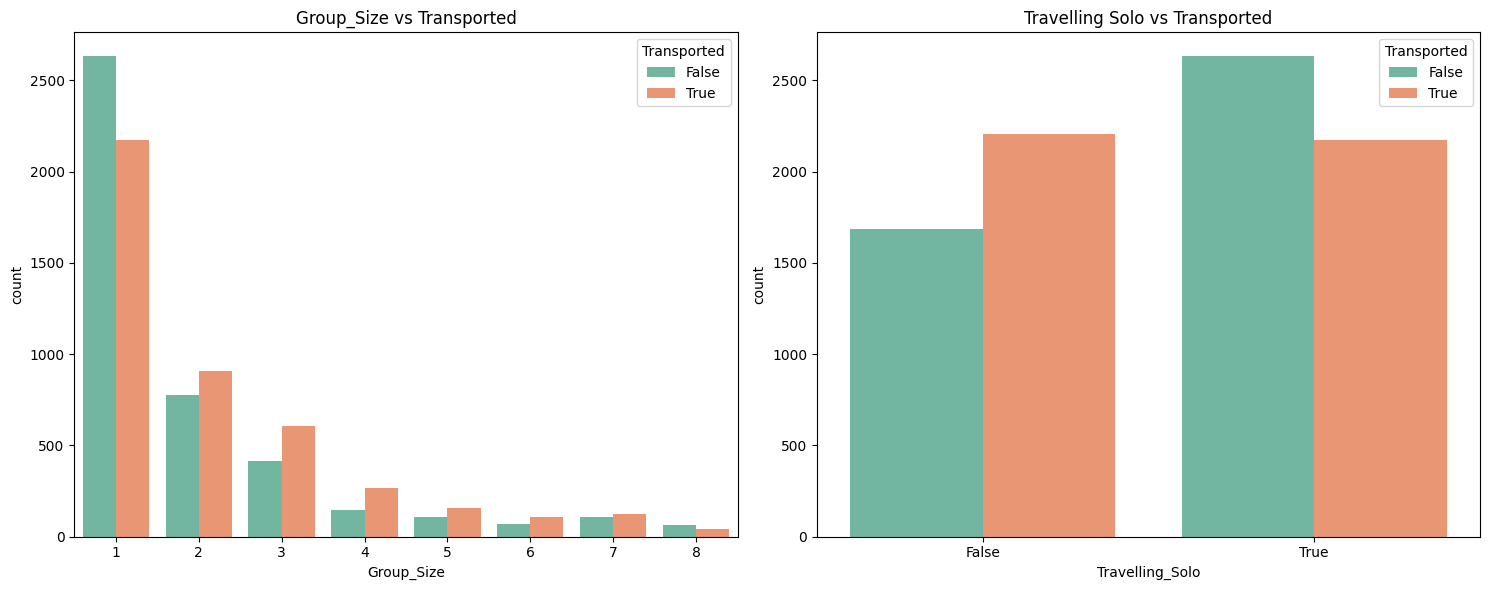

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(x="Group_Size", hue="Transported", data=train_df,palette="Set2")
plt.title("Group_Size vs Transported")

plt.subplot(1,2,2)
sns.countplot(x="Travelling_Solo", hue="Transported", data=train_df,palette="Set2")
plt.title("Travelling Solo vs Transported")
plt.tight_layout()
plt.show()

In [ ]:
train_df["Cabin"].head().to_frame()

,Cabin
0,B/0/P
1,F/0/S
2,A/0/S
3,A/0/S
4,F/1/S


In [ ]:
def cabin_new_feature(df):
    df["Cabin"].fillna("np.nan/np.nan/np.nan",inplace=True)  #In this way we can split NaN values into all three categories

    df["Cabin_Deck"] = df["Cabin"].apply(lambda x: x.split("/")[0])
    df["Cabin_Number"]  = df["Cabin"].apply(lambda x: x.split("/")[1])
    df["Cabin_Side"] = df["Cabin"].apply(lambda x: x.split("/")[2])

    #Replacing string nan values to numpy nan values..
    cols = ["Cabin_Deck","Cabin_Number","Cabin_Side"]
    df[cols]=df[cols].replace("np.nan",np.nan)

    #Filling Missing Values in new features created.
    df["Cabin_Deck"].fillna(df["Cabin_Deck"].mode()[0],inplace=True)
    df["Cabin_Side"].fillna(df["Cabin_Side"].mode()[0],inplace=True)
    df["Cabin_Number"].fillna(df["Cabin_Number"].median(),inplace=True)

In [ ]:
cabin_new_feature(train_df)
cabin_new_feature(test_df)

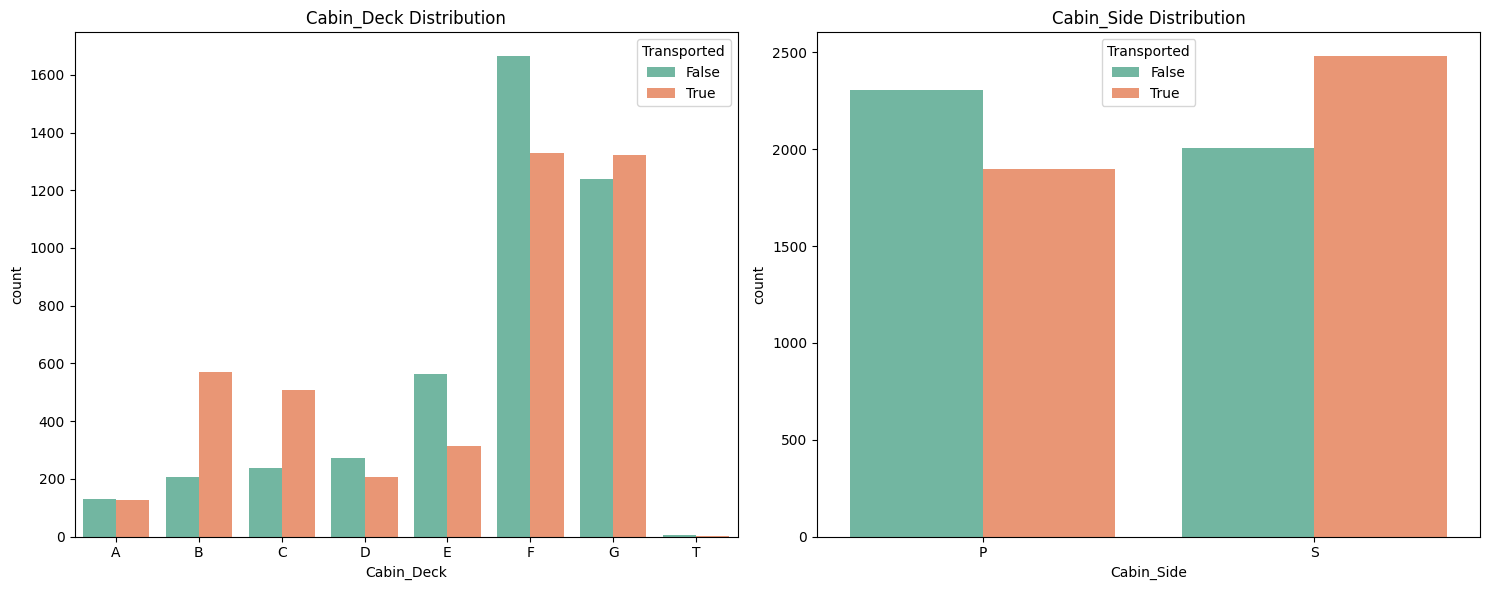

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x="Cabin_Deck",hue="Transported", data=train_df, palette="Set2",order=["A","B","C","D","E","F","G","T"])
plt.title("Cabin_Deck Distribution")

plt.subplot(1,2,2)
sns.countplot(x="Cabin_Side", hue="Transported", data=train_df, palette="Set2")
plt.title("Cabin_Side Distribution")
plt.tight_layout()
plt.show()

In [ ]:
train_df["Cabin_Number"]=train_df["Cabin_Number"].astype(int)#cambiamos el tipo de dato
test_df["Cabin_Number"]=test_df["Cabin_Number"].astype(int)

In [ ]:
print("unique cabin:",train_df["Cabin_Number"].nunique())
print("mean cabin number: ",train_df["Cabin_Number"].mean())
print("mediana:",train_df["Cabin_Number"].median())
print("min:",train_df["Cabin_Number"].min())
print("Tmax:",train_df["Cabin_Number"].max())

unique cabin: 1817
mean cabin number:  596.3989416772115
mediana: 427.0
min: 0
Tmax: 1894


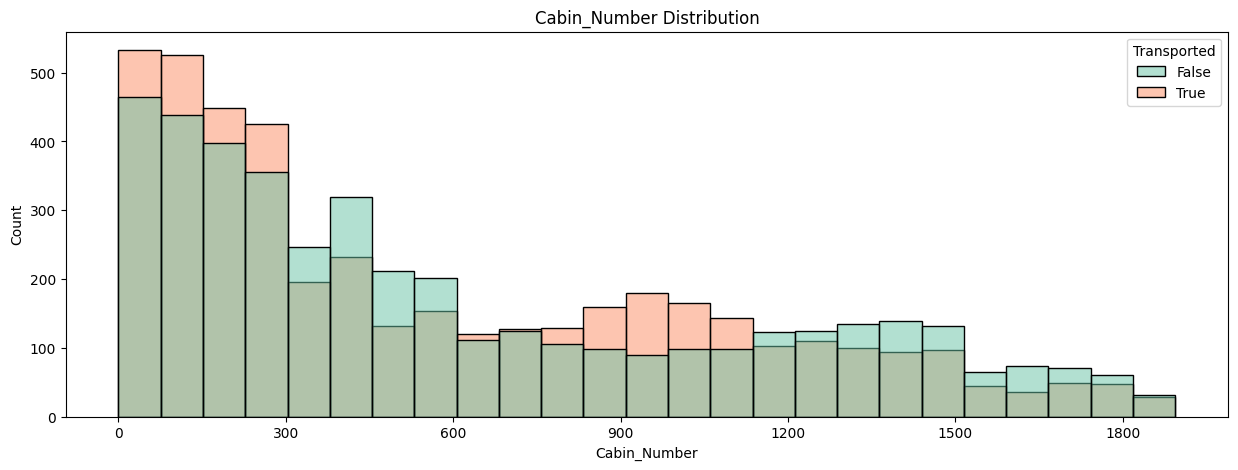

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x="Cabin_Number",data=train_df,hue="Transported",palette="Set2")
plt.title("Cabin_Number Distribution")
plt.xticks(list(range(0,1900,300)))

plt.show()# se paren algunas graficas los podemos poner como familias o regiones

In [ ]:
def cabin_regions(df):
    df["Cabin_Region1"] = (df["Cabin_Number"]<300)
    df["Cabin_Region2"] = (df["Cabin_Number"]>=300) & (df["Cabin_Number"]<600)
    df["Cabin_Region3"] = (df["Cabin_Number"]>=600) & (df["Cabin_Number"]<900)
    df["Cabin_Region4"] = (df["Cabin_Number"]>=900) & (df["Cabin_Number"]<1200)
    df["Cabin_Region5"] = (df["Cabin_Number"]>=1200) & (df["Cabin_Number"]<1500)
    df["Cabin_Region6"] = (df["Cabin_Number"]>=1500)

In [ ]:
cabin_regions(train_df)
cabin_regions(test_df)

In [ ]:
train_df.drop(columns=["Cabin_Number"],inplace=True)
test_df.drop(columns=["Cabin_Number"],inplace=True)

In [ ]:
#ahora agruuparemos las edades
def age_group(df):
    age_group  = []
    for i in df["Age"]:
        if i<=12:
            age_group.append("Age_0-12")
        elif (i>12 and i<=18):
            age_group.append("Age_0-18")
        elif (i>18 and i<=25):
            age_group.append("Age_19-25")
        elif (i>25 and i<=32):
            age_group.append("Age_26-32")
        elif (i>32 and i<=50):
            age_group.append("Age_33_50")
        elif (i>50):
            age_group.append("age_50+")
        else:
            age_group.append(np.nan)

    df["Age Group"] = age_group

In [ ]:
age_group(train_df)
age_group(test_df)

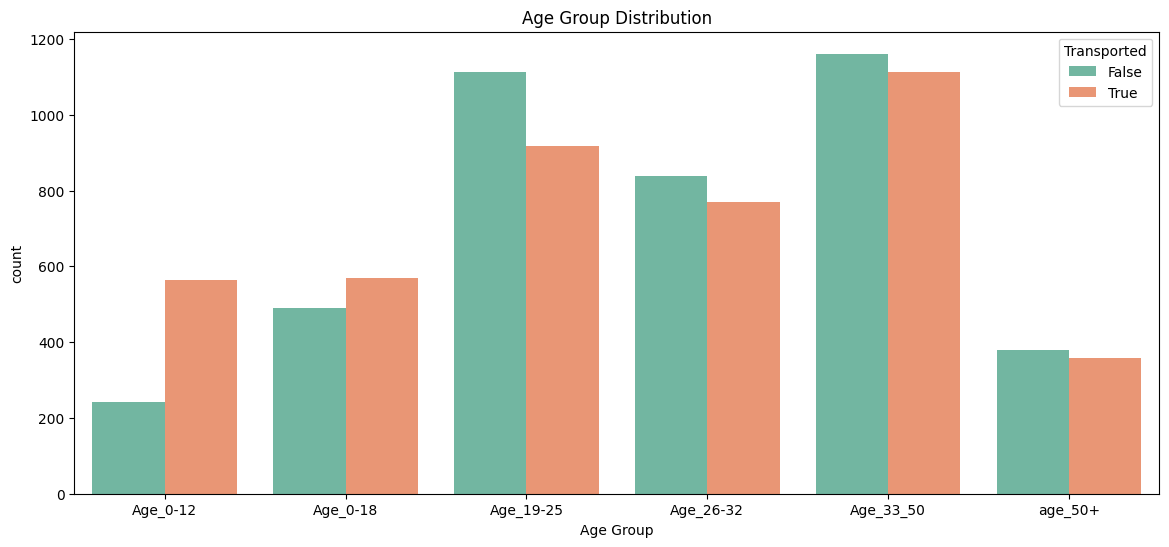

In [ ]:
order = sorted(train_df["Age Group"].value_counts().keys().to_list())

plt.figure(figsize=(14,6))
sns.countplot(x="Age Group",hue="Transported", data=train_df, palette="Set2",order=order)
plt.title("Age Group Distribution");

In [ ]:
#this persons in the ship waste some money lets sum
train_df[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0


In [ ]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

def new_exp_features(df):
    df["Total Expenditure"] = df[exp_cols].sum(axis=1)
    df["No Spending"] = (df["Total Expenditure"]==0)

In [ ]:
new_exp_features(train_df)
new_exp_features(test_df)

In [ ]:
print("Missing numbers left in train_df is:",train_df.isnull().sum().sum())
print("Missing numbers left in test_df is:",test_df.isnull().sum().sum())

Missing numbers left in train_df is: 2304
Missing numbers left in test_df is: 1108


In [ ]:
print("Duplicate values in training data is: ",train_df.duplicated().sum())
print("Duplicate values in testing data is: ",test_df.duplicated().sum())

Duplicate values in training data is:  0
Duplicate values in testing data is:  0


In [ ]:
#DATA PRE PROCESSING

In [ ]:
z = train_df.isnull().sum()[train_df.isnull().sum()>0].to_frame().rename(columns={0:"No. of Missing values"})
z["% of Missing values"] = round(train_df.isnull().sum()[train_df.isnull().sum()>0]*100/len(train_df),2)
z

,No. of Missing values,% of Missing values
HomePlanet,201,2.31
CryoSleep,217,2.50
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11
VRDeck,188,2.16


In [ ]:
train_df.isnull().sum()# ya tenemos df sin nulos

PassengerId            0
HomePlanet           201
CryoSleep            217
Cabin                  0
Destination          182
Age                  179
VIP                  203
RoomService          181
FoodCourt            183
ShoppingMall         208
Spa                  183
VRDeck               188
Name                 200
Transported            0
Travelling_Solo        0
Group_Size             0
Cabin_Deck             0
Cabin_Side             0
Cabin_Region1          0
Cabin_Region2          0
Cabin_Region3          0
Cabin_Region4          0
Cabin_Region5          0
Cabin_Region6          0
Age Group            179
Total Expenditure      0
No Spending            0
dtype: int64

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        8693 non-null   object 
 1   HomePlanet         8492 non-null   object 
 2   CryoSleep          8476 non-null   object 
 3   Cabin              8693 non-null   object 
 4   Destination        8511 non-null   object 
 5   Age                8514 non-null   float64
 6   VIP                8490 non-null   object 
 7   RoomService        8512 non-null   float64
 8   FoodCourt          8510 non-null   float64
 9   ShoppingMall       8485 non-null   float64
 10  Spa                8510 non-null   float64
 11  VRDeck             8505 non-null   float64
 12  Name               8493 non-null   object 
 13  Transported        8693 non-null   bool   
 14  Travelling_Solo    8693 non-null   bool   
 15  Group_Size         8693 non-null   int64  
 16  Cabin_Deck         8693 

In [ ]:
train_df.dropna(inplace=True)# eliminamos nulos

In [ ]:
test_df.dropna(inplace=True)# eliminamos nulos

In [ ]:
train_df.isnull().sum()# ya tenemos df sin nulos

PassengerId          0
HomePlanet           0
CryoSleep            0
Cabin                0
Destination          0
Age                  0
VIP                  0
RoomService          0
FoodCourt            0
ShoppingMall         0
Spa                  0
VRDeck               0
Name                 0
Transported          0
Travelling_Solo      0
Group_Size           0
Cabin_Deck           0
Cabin_Side           0
Cabin_Region1        0
Cabin_Region2        0
Cabin_Region3        0
Cabin_Region4        0
Cabin_Region5        0
Cabin_Region6        0
Age Group            0
Total Expenditure    0
No Spending          0
dtype: int64

In [ ]:
#cambiamos el tipo de los datos de los object a boolean
cols = ["CryoSleep","VIP","Travelling_Solo","No Spending","Cabin_Region1","Cabin_Region2","Cabin_Region3","Cabin_Region4",
       "Cabin_Region5","Cabin_Region6"]

train_df[cols] = train_df[cols].astype(bool)
test_df[cols] = test_df[cols].astype(bool)

In [ ]:
nominal_cat_cols = ["HomePlanet","Destination"]
ordinal_cat_cols = ["CryoSleep","VIP","Travelling_Solo","Cabin_Deck","Cabin_Side","Cabin_Region1","Cabin_Region2",
                    "Cabin_Region3","Cabin_Region4","Cabin_Region5","Cabin_Region6","Age Group","No Spending"]

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [ ]:
#label encoding

enc = LabelEncoder()

In [ ]:
#aqui me quede

In [ ]:
train_df[ordinal_cat_cols] = train_df[ordinal_cat_cols].apply(enc.fit_transform)
test_df[ordinal_cat_cols] = test_df[ordinal_cat_cols].apply(enc.fit_transform)

In [ ]:
train_df = pd.get_dummies(train_df,columns=nominal_cat_cols)
test_df = pd.get_dummies(test_df,columns=nominal_cat_cols)


In [ ]:
train_df["Transported"].replace({False:0,True:1},inplace=True)#sacamos a target


In [ ]:
train_df.head()


,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin_Region6,Age Group,Total Expenditure,No Spending,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,...,0,4,0.0,1,False,True,False,False,False,True
1,0002_01,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,...,0,2,736.0,0,True,False,False,False,False,True
2,0003_01,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,...,0,5,10383.0,0,False,True,False,False,False,True
3,0003_02,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,...,0,4,5176.0,0,False,True,False,False,False,True
4,0004_01,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,...,0,1,1091.0,0,True,False,False,False,False,True


In [ ]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6764 entries, 0 to 8692
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                6764 non-null   object 
 1   CryoSleep                  6764 non-null   int64  
 2   Cabin                      6764 non-null   object 
 3   Age                        6764 non-null   float64
 4   VIP                        6764 non-null   int64  
 5   RoomService                6764 non-null   float64
 6   FoodCourt                  6764 non-null   float64
 7   ShoppingMall               6764 non-null   float64
 8   Spa                        6764 non-null   float64
 9   VRDeck                     6764 non-null   float64
 10  Name                       6764 non-null   object 
 11  Transported                6764 non-null   int64  
 12  Travelling_Solo            6764 non-null   int64  
 13  Group_Size                 6764 non-null   int64  
 1

In [ ]:
pass_df = test_df[["PassengerId"]]

In [ ]:
cols = ["PassengerId","Cabin","Name"]
train_df.drop(columns =cols, inplace=True)
test_df.drop(columns=cols, inplace=True)

## split train/test

Entrenaremos con un 70% del dataset de entrenamiento y nos quedamos con 30% de test para evaluar el modelo.

In [ ]:
# @title

# definimos la target
y = train_df['Transported']

# quitamos la target del dataset de entrenamiento y del sataset a predecir
X = train_df.drop('Transported', axis=1)


# split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# @title
# comprobamos los tamaños de los datasets
print('X_train ', X_train.shape)
print('X_test  ', X_test.shape)

X_train  (4734, 27)
X_test   (2030, 27)


## estandarización

In [ ]:
# @title
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)       # estandariza y define la regla de estandarización
X_test = scaler.transform(X_test)             # estandariza según la regla definida con el X_train  estandariza según la regla definida con el X_train

# Entrenamiento

Utilizaremos el valor del AUC para medir el rendimiento de 6 modelos diferentes.

In [ ]:
# @title
def medicion(y_t, y_p):
  """imprime la curva ROC y el AUC"""

  # calculate the fpr and tpr for all thresholds of the classification
  fpr, tpr, threshold = metrics.roc_curve(y_t, y_p)
  roc_auc = metrics.auc(fpr, tpr)

  # method I: plt
  import matplotlib.pyplot as plt
  plt.figure(figsize=(8, 6))
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()
  return roc_auc

In [ ]:
# @title
def entrenar(Xtrain, Xtest, ytrain, ytest):
  """entrena 6 módelos.
      imprime la curva roc de cada módelo junto al valor AUC
      devuelve un dataframe con los valores de AUC redondeados a 5 decimales para cada módelo"""

  # creamos la lista de auc vacía
  lista_aucs = []

  # Support Vector Machine
  print('Support Vector Machine')
  svclassifier = SVC(kernel="linear", max_iter=20)

  svclassifier.fit(Xtrain, ytrain)
  y_pred = svclassifier.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('SVC', round(roc_auc, 5)))
  print('*'*80)

  # Regresión logística
  print('Regresión logística')
  lr = LogisticRegression(max_iter=40)

  lr.fit(Xtrain, ytrain)
  y_pred = lr.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('regresión logística', round(roc_auc, 5)))
  print('*'*80)

  # Decision tree classsifier
  print('Decision tree classsifier')
  dt_base = DecisionTreeClassifier(random_state=42)

  dt_base.fit(Xtrain, ytrain)
  y_pred = dt_base.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('decision tree classifier', round(roc_auc, 5)))
  print('*'*80)

  # Random forest
  print('Random forest')
  rf_base = RandomForestClassifier(random_state=42)

  rf_base.fit(Xtrain, ytrain)
  y_pred = rf_base.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('random forest', round(roc_auc, 5)))
  print('*'*80)

  # Gradient boosting
  print('Gradient boosting')
  gbc_base = GradientBoostingClassifier(random_state=42)

  gbc_base.fit(Xtrain, ytrain)
  y_pred = gbc_base.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('gradient boosting', round(roc_auc, 5)))
  print('*'*80)

  # XGBClassifier
  print('XGBClassifier')
  xgbc_base = xgb.XGBClassifier(random_state=42)

  xgbc_base.fit(Xtrain, ytrain)
  y_pred = xgbc_base.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('XGB classifier', round(roc_auc, 5)))
  print('*'*80)

  df_aucs = pd.DataFrame(lista_aucs, columns=['modelos', 'AUC'])
  df_aucs = df_aucs.set_index('modelos')

  return df_aucs

Support Vector Machine


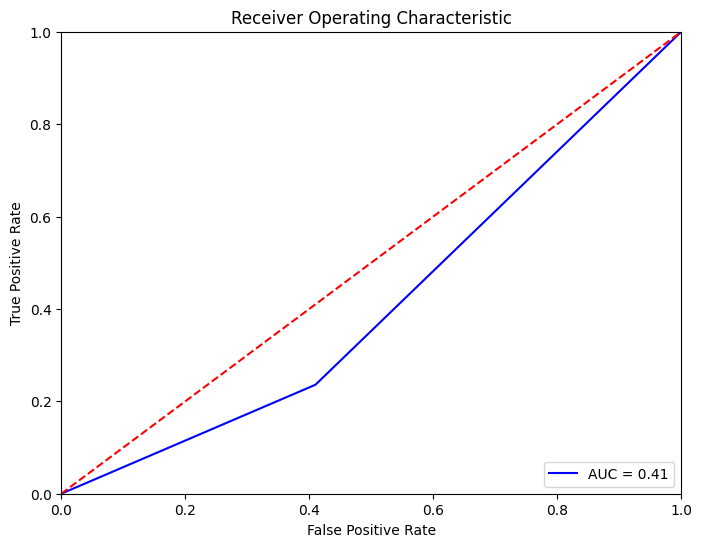

********************************************************************************
Regresión logística


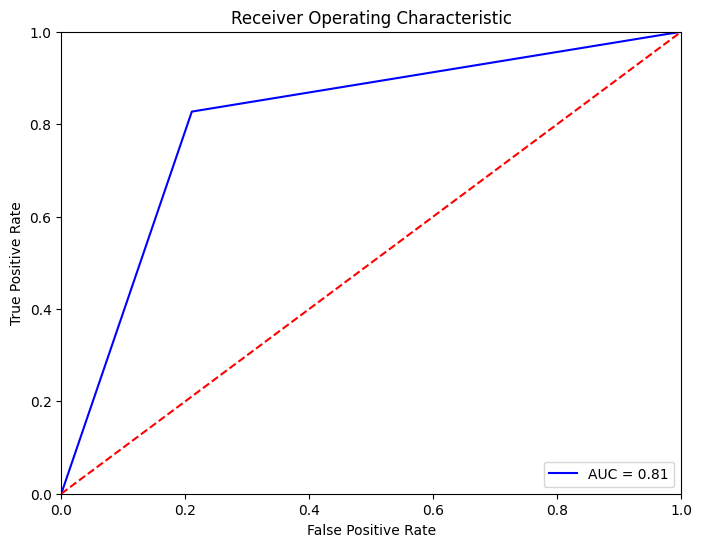

********************************************************************************
Decision tree classsifier


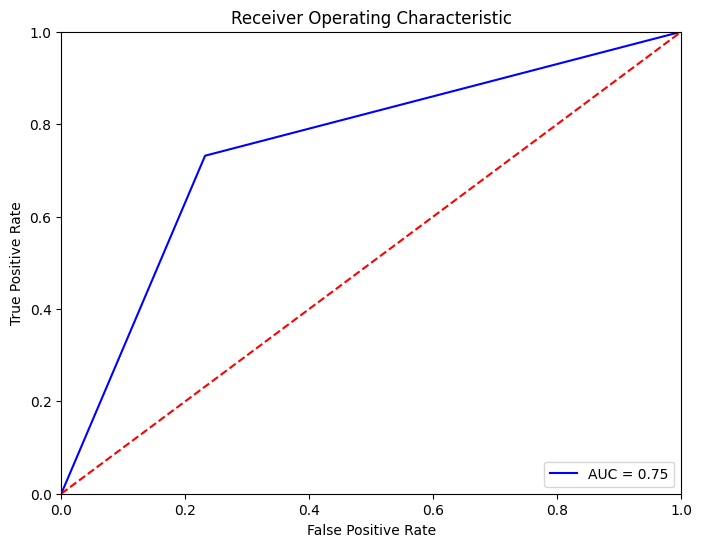

********************************************************************************
Random forest


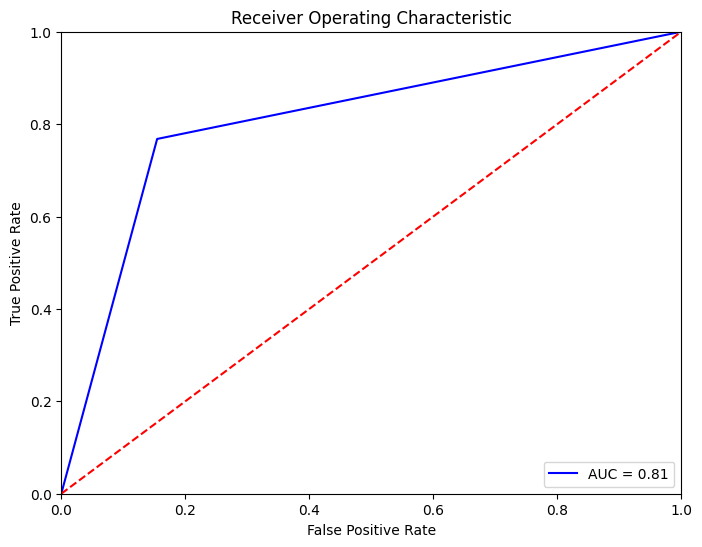

********************************************************************************
Gradient boosting


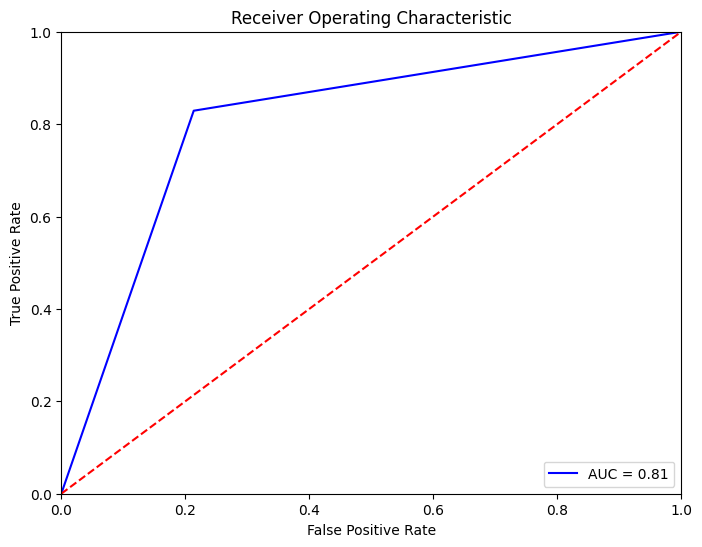

********************************************************************************
XGBClassifier


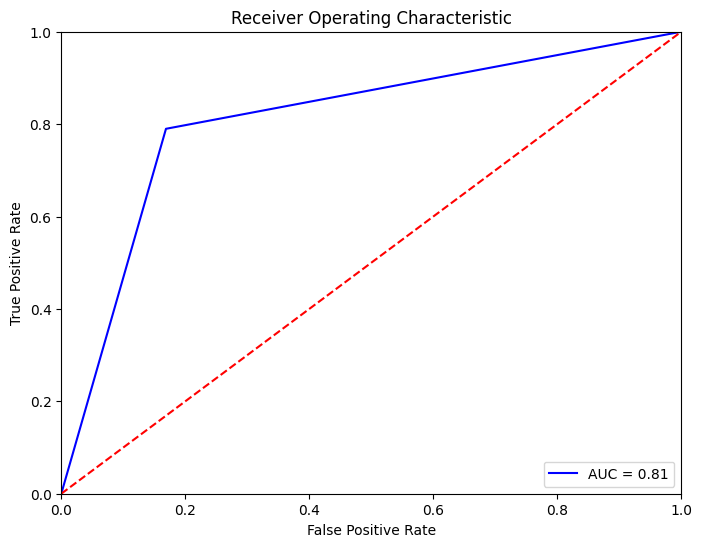

********************************************************************************


In [ ]:
#  @title competición de modelos

# descomentar para hacer la competición
aucs = entrenar(X_train, X_test, y_train, y_test)

In [ ]:
# @title medición

# descomentar para ver los aucs por algoritmo
aucs

,AUC
modelos,
SVC,0.41297
regresión logística,0.80827
decision tree classifier,0.74984
random forest,0.80664
gradient boosting,0.80770
XGB classifier,0.81050


In [ ]:
pred=gbc_base.predict(test_df)

In [ ]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pass_df.head()

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01


In [ ]:
pass_df["Transported"] = pred

In [ ]:
pass_df.head()

,PassengerId,Transported
0,0013_01,0
1,0018_01,0
2,0019_01,0
3,0021_01,0
4,0023_01,1


In [ ]:
pass_df["Transported"].replace({1:True,0:False},inplace=True)

In [ ]:
pass_df.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,True


Transported
False    3071
True      292
Name: count, dtype: int64


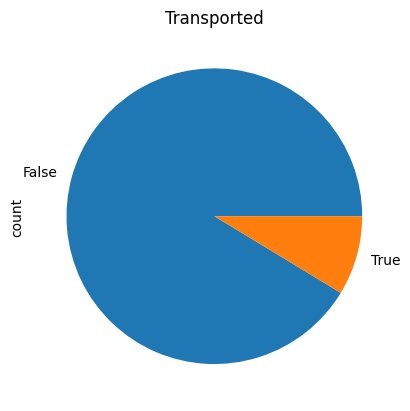

In [ ]:
pass_df['Transported'].value_counts().plot(kind='pie', title="Transported")
print(pass_df['Transported'].value_counts())

In [ ]:
# @title exportar los datos

pass_df.to_excel('classspacemountain.xlsx', sheet_name='transported')